In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle

## Load Dataset

In [4]:
df = pd.read_csv("Autism_2018.csv")

In [5]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

## Check Missing Value

In [7]:
df.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [8]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


## Preprocessing Data

### Drop Unused Columns

In [9]:
df.drop(['Case_No'], axis=1, inplace=True)

# drop kolom Qchat-10-score (karena merupakan summarize A1-A10 )**
df.drop(['Qchat-10-Score'], axis=1, inplace=True)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,family member,Yes


In [10]:
print(df['Ethnicity'].unique())

['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica']


In [11]:
# Replace south asian as asian
df.replace('south asian', 'asian', inplace=True)

# Select only Asian Ethnic, then drop Ethnicity columns
df_asian = df.loc[df['Ethnicity'] == 'asian']
df_asian = df_asian.drop(['Ethnicity'], axis=1)
df_asian.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
6,1,0,0,1,1,1,0,0,1,0,33,m,yes,no,family member,Yes
7,0,1,0,0,1,0,1,1,1,1,33,m,yes,no,family member,Yes
8,0,0,0,0,0,0,1,0,0,1,36,m,no,no,family member,No
9,1,1,1,0,1,1,0,1,1,1,22,m,no,no,Health Care Professional,Yes
45,0,0,0,0,0,0,1,0,0,1,19,m,no,no,family member,No


### Checking Inconsistent categorical values

In [12]:
cat_columns = list(df_asian.columns[11:15])
for col in cat_columns:
    print(f"""{col} : {df_asian[col].unique()}""")

Sex : ['m' 'f']
Jaundice : ['yes' 'no']
Family_mem_with_ASD : ['no' 'yes']
Who completed the test : ['family member' 'Health Care Professional' 'Health care professional']


In [13]:
# Sex column
df_asian['Sex'].replace('m', 'male', inplace= True)
df_asian['Sex'].replace('f', 'female', inplace= True)

In [14]:
# Who_com_the_test columns
df_asian['Who completed the test'].replace('Health care professional', 'health care professional', inplace=True)
df_asian['Who completed the test'].replace('Health Care Professional', 'health care professional', inplace=True)

In [15]:
for col in cat_columns:
    print(f"""{col} : {df_asian[col].unique()}""")

Sex : ['male' 'female']
Jaundice : ['yes' 'no']
Family_mem_with_ASD : ['no' 'yes']
Who completed the test : ['family member' 'health care professional']


### Handling Categorical Values

In [16]:
# Features Encoding (One-Hot-Encoder)
df_asian = pd.get_dummies(data=df_asian, columns=cat_columns)
df_asian.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Sex_female,Sex_male,Jaundice_no,Jaundice_yes,Family_mem_with_ASD_no,Family_mem_with_ASD_yes,Who completed the test_family member,Who completed the test_health care professional
6,1,0,0,1,1,1,0,0,1,0,33,Yes,0,1,0,1,1,0,1,0
7,0,1,0,0,1,0,1,1,1,1,33,Yes,0,1,0,1,1,0,1,0
8,0,0,0,0,0,0,1,0,0,1,36,No,0,1,1,0,1,0,1,0
9,1,1,1,0,1,1,0,1,1,1,22,Yes,0,1,1,0,1,0,0,1
45,0,0,0,0,0,0,1,0,0,1,19,No,0,1,1,0,1,0,1,0


In [17]:
# Label Encoding (Label Encoder)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
df_asian['Class/ASD Traits '] = le.fit_transform(df_asian['Class/ASD Traits '])
df_asian.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Sex_female,Sex_male,Jaundice_no,Jaundice_yes,Family_mem_with_ASD_no,Family_mem_with_ASD_yes,Who completed the test_family member,Who completed the test_health care professional
6,1,0,0,1,1,1,0,0,1,0,33,1,0,1,0,1,1,0,1,0
7,0,1,0,0,1,0,1,1,1,1,33,1,0,1,0,1,1,0,1,0
8,0,0,0,0,0,0,1,0,0,1,36,0,0,1,1,0,1,0,1,0
9,1,1,1,0,1,1,0,1,1,1,22,1,0,1,1,0,1,0,0,1
45,0,0,0,0,0,0,1,0,0,1,19,0,0,1,1,0,1,0,1,0
56,1,0,0,0,0,1,1,0,1,1,32,1,1,0,1,0,1,0,1,0
57,0,0,0,1,1,1,1,1,1,0,25,1,0,1,1,0,1,0,1,0
68,1,0,1,0,0,0,0,0,0,0,23,0,0,1,1,0,0,1,1,0
69,1,0,1,1,1,1,1,0,1,1,18,1,1,0,0,1,0,1,1,0
71,0,0,1,1,1,1,1,0,1,1,34,1,0,1,1,0,1,0,1,0


### Handling Numerical Values (Min-Max Scaler)

In [19]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()

In [20]:
# save mx scaler for future predict data
new_scaler = mx.fit(df_asian[['Age_Mons']])
with open ('mx_scaler.pkl', 'wb') as mx_scl:
    pickle.dump(new_scaler, mx_scl)

In [21]:
df_asian['Age_Mons'] = mx.fit_transform(df_asian[['Age_Mons']])
df_asian.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Sex_female,Sex_male,Jaundice_no,Jaundice_yes,Family_mem_with_ASD_no,Family_mem_with_ASD_yes,Who completed the test_family member,Who completed the test_health care professional
6,1,0,0,1,1,1,0,0,1,0,0.875000,1,0,1,0,1,1,0,1,0
7,0,1,0,0,1,0,1,1,1,1,0.875000,1,0,1,0,1,1,0,1,0
8,0,0,0,0,0,0,1,0,0,1,1.000000,0,0,1,1,0,1,0,1,0
9,1,1,1,0,1,1,0,1,1,1,0.416667,1,0,1,1,0,1,0,0,1
45,0,0,0,0,0,0,1,0,0,1,0.291667,0,0,1,1,0,1,0,1,0
56,1,0,0,0,0,1,1,0,1,1,0.833333,1,1,0,1,0,1,0,1,0
57,0,0,0,1,1,1,1,1,1,0,0.541667,1,0,1,1,0,1,0,1,0
68,1,0,1,0,0,0,0,0,0,0,0.458333,0,0,1,1,0,0,1,1,0
69,1,0,1,1,1,1,1,0,1,1,0.250000,1,1,0,0,1,0,1,1,0
71,0,0,1,1,1,1,1,0,1,1,0.916667,1,0,1,1,0,1,0,1,0


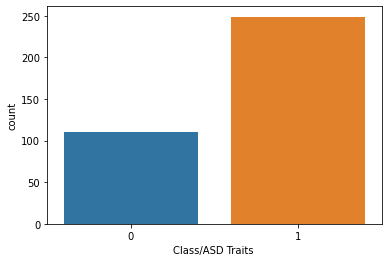

In [31]:
df_asian['Class/ASD Traits '].value_counts()
ax = sns.countplot(data=df_asian, x="Class/ASD Traits ")

## Feature Selection

In [23]:
# reset index
df_asian.reset_index(inplace=True)
df_asian.drop(['index'], axis=1, inplace=True)

In [24]:
df_asian.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Sex_female,Sex_male,Jaundice_no,Jaundice_yes,Family_mem_with_ASD_no,Family_mem_with_ASD_yes,Who completed the test_family member,Who completed the test_health care professional
0,1,0,0,1,1,1,0,0,1,0,0.875000,1,0,1,0,1,1,0,1,0
1,0,1,0,0,1,0,1,1,1,1,0.875000,1,0,1,0,1,1,0,1,0
2,0,0,0,0,0,0,1,0,0,1,1.000000,0,0,1,1,0,1,0,1,0
3,1,1,1,0,1,1,0,1,1,1,0.416667,1,0,1,1,0,1,0,0,1
4,0,0,0,0,0,0,1,0,0,1,0.291667,0,0,1,1,0,1,0,1,0


In [25]:
feature = df_asian.drop('Class/ASD Traits ', axis=1)
label = df_asian['Class/ASD Traits ']

In [26]:
corr = df_asian.corr()
feature_corr = abs(corr['Class/ASD Traits ']).sort_values(ascending=False)
feature_corr

Class/ASD Traits                                   1.000000
A5                                                 0.575094
A9                                                 0.557747
A6                                                 0.477838
A7                                                 0.430758
A8                                                 0.427589
A1                                                 0.421934
A4                                                 0.404027
A2                                                 0.400207
A3                                                 0.266507
Family_mem_with_ASD_yes                            0.179284
Family_mem_with_ASD_no                             0.179284
A10                                                0.148747
Jaundice_yes                                       0.041204
Jaundice_no                                        0.041204
Sex_female                                         0.031768
Sex_male                                

### ANALISIS BIVARIAT

- H0 = kedua peubah/variabel saling bebas.
- H1 = kedua variabel tidak saling bebas (saling  berhubungan, x dan y signifikan memiliki hubungan)

  - jika p values < 5% maka tolak H0 dan berlaku H1

In [43]:
contigency_a1= pd.crosstab(df_asian['A1'], df_asian['Class/ASD Traits '])
contigency_a1

Class/ASD Traits,0,1
A1,,
0,86,81
1,24,168


In [44]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_a1)
p

3.2807349142945602e-15

In [47]:
contigency_a2= pd.crosstab(df_asian['A2'], df_asian['Class/ASD Traits '])
contigency_a2

Class/ASD Traits,0,1
A2,,
0,102,127
1,8,122


In [48]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_a2)
p

8.41015607015484e-14

In [52]:
contigency_a3= pd.crosstab(df_asian['A3'], df_asian['Class/ASD Traits '])
contigency_a3

Class/ASD Traits,0,1
A3,,
0,90,134
1,20,115


In [53]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_a3)
p

8.163812474212157e-07

In [54]:
contigency_a4= pd.crosstab(df_asian['A4'], df_asian['Class/ASD Traits '])
contigency_a4

Class/ASD Traits,0,1
A4,,
0,91,97
1,19,152


In [55]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_a4)
p

4.6782427754369296e-14

In [56]:
contigency_a5= pd.crosstab(df_asian['A5'], df_asian['Class/ASD Traits '])
contigency_a5

Class/ASD Traits,0,1
A5,,
0,97,65
1,13,184


In [58]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_a5)
p

4.212197985248837e-27

In [60]:
contigency_a6= pd.crosstab(df_asian['A6'], df_asian['Class/ASD Traits '])
contigency_a6

Class/ASD Traits,0,1
A6,,
0,87,69
1,23,180


In [61]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_a6)
p

3.953775232849488e-19

In [62]:
contigency_Jaundice= pd.crosstab(df_asian['Jaundice_yes'], df_asian['Class/ASD Traits '])
contigency_Jaundice

Class/ASD Traits,0,1
Jaundice_yes,,
0,93,202
1,17,47


In [63]:
# Chi-square test of independence.
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency_Jaundice)
p

0.5279422003917585

## Splitting Data & Train Model

In [65]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3, random_state=20)
print(f"""
x_train = {len(X_train)}
x_test = {len(X_test)}
""")


x_train = 251
x_test = 108



In [66]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before', counter)

#oversampling the train dataset using SMOTE
smote = SMOTE()

#X_train, y_train = smote.fit.resample(X_train, y_train)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({1: 172, 0: 79})
After Counter({1: 172, 0: 172})


## Modelling and Evaluate

### A. SVM

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
model = svm.SVC(kernel='linear', C=1)
model.fit(X_train_sm,y_train_sm)
y_pred_svm = model.predict(X_test)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.97      1.00      0.99        77

    accuracy                           0.98       108
   macro avg       0.99      0.97      0.98       108
weighted avg       0.98      0.98      0.98       108



In [69]:
cm = confusion_matrix(y_test, y_pred_svm)
cm

array([[29,  2],
       [ 0, 77]], dtype=int64)

### B. KNN

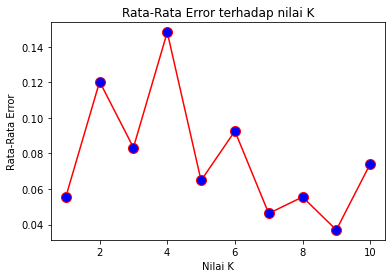

In [70]:
from sklearn.neighbors import KNeighborsClassifier

error = []

for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 11), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_sm, y_train_sm)
y_pred_knn = knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87        31
           1       1.00      0.88      0.94        77

    accuracy                           0.92       108
   macro avg       0.89      0.94      0.91       108
weighted avg       0.94      0.92      0.92       108



In [72]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[31  0]
 [ 9 68]]


## Save Model

In [58]:
import pickle

In [32]:
with open('svm_autism.pkl', 'wb') as save:
    pickle.dump(model, save)

In [33]:
with open('svm_autism.pkl', 'rb') as load:
    svm_load = pickle.load(load)

In [36]:
print(f'Model Accuracy : ', svm_load.score(X_test, y_test))

Model Accuracy :  0.9814814814814815
